In [3]:
import sys
import os


sys.path.append(os.path.abspath("../../project"))  

In [4]:
import cirq
from qudit_cirq.circuit_builder import create_circuit
from qudit_cirq.utils import format_out, printVector, tensor_product
from qudit_cirq.qudit import quditXGate, quditZGate, quditHGate, quditCNOTGate, state_vector, qudit_measure, quditU8Gate, quditPhaseGate, quditCZGate

In [5]:
d = 3

control = cirq.LineQid(1, dimension=d)
target = cirq.LineQid(0, dimension=d)

cz_gate = quditCZGate(d)

circuit = cirq.Circuit(
    cz_gate(control, target)
)

print("Circuit:")
print(circuit)

Circuit:
0 (d=3): ───Z(d=3)───
            │
1 (d=3): ───@(d=3)───


In [6]:
d = 5

qubit = qudit = cirq.LineQid(0, d)

u8_gate = quditU8Gate(d)
phase_gate = quditPhaseGate(d)


circuit = cirq.Circuit(
    u8_gate(qubit),
    phase_gate(qubit),
)

print(circuit)

[0, 3, 3, 2, 2]
0 (d=5): ───U8(d=5)───P(d=5)───


In [7]:
u8_unitary = cirq.unitary(u8_gate)
print("Unitary matrix of U_{pi/8} gate:")
print(u8_unitary)

Unitary matrix of U_{pi/8} gate:
[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.80901699-0.58778525j  0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.80901699-0.58778525j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.80901699+0.58778525j  0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j         -0.80901699+0.58778525j]]


In [8]:
d = 4 # dimensions

In [9]:
import cirq
import numpy as np
from qudit_cirq.qudit import quditHGate, qudit_measure
from qudit_cirq.utils import printVector

# Define the qudit dimension
d = 3  # Dimension of the qudits

# Create qudits
qudit1 = cirq.NamedQid('q0', dimension=d)
qudit2 = cirq.NamedQid('q1', dimension=d)

# Build the circuit
circuit = cirq.Circuit()
circuit.append(quditHGate(d).on(qudit1))
circuit.append(quditHGate(d).on(qudit2))

# Optionally, print the circuit
print("Circuit:")
print(circuit)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.simulate(circuit)

# Get the final state vector
final_state = result.final_state_vector

# List of qudits in order
qudit_order = [qudit1, qudit2]

# Print the state vector using printVector
printVector(final_state, dimensions=[d, d], qudits=qudit_order)


Circuit:
q0 (d=3): ───H(d=3)───

q1 (d=3): ───H(d=3)───

Final state vector:
|00⟩: (0.3333333432674408+0j)
|01⟩: (0.3333333432674408+0j)
|02⟩: (0.3333333432674408+0j)
|10⟩: (0.3333333432674408+0j)
|11⟩: (0.3333333432674408+0j)
|12⟩: (0.3333333432674408+0j)
|20⟩: (0.3333333432674408+0j)
|21⟩: (0.3333333432674408+0j)
|22⟩: (0.3333333432674408+0j)


In [10]:
import numpy as np

from qudit_cirq.utils import format_out

# Define a matrix with complex elements
matrix = np.array([[1+0j, 0+0j], [0+0j, -1+0j]])

# Format the matrix as integers
formatted_matrix = format_out(matrix, output_type='float')

print("Formatted Matrix:")
print(formatted_matrix)

Formatted Matrix:
[['1.0' '0.0']
 ['0.0' '-1.0']]


In [11]:
circuit

q0 (d=3): ───H(d=3)───

q1 (d=3): ───H(d=3)───

In [12]:
x_gate = quditCNOTGate(d=2)
x_unitary = cirq.unitary(x_gate)
print(x_unitary)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [13]:
qudit0 = cirq.LineQid(0, dimension=d)
qudit1 = cirq.LineQid(1, dimension=d)

qudit_x = quditXGate(d)
qudit_z = quditZGate(d)
qudit_h = quditHGate(d)
qudit_cnot = quditCNOTGate(d)

In [14]:
circuit = cirq.Circuit()

circuit.append(qudit_h.on(qudit0))
circuit.append(qudit_cnot.on(qudit0, qudit1))
circuit.append(qudit_x.on(qudit1))
circuit.append(qudit_z.on(qudit0))
circuit.append(qudit_measure(qudit0, key='m0'))
circuit.append(qudit_measure(qudit1, key='m1'))

print("Circuit:")
print(circuit)

Circuit:
0 (d=3): ───H(d=3)───C(d=3)───Z^1(d=3)───M('m0')───
                     │
1 (d=3): ────────────X(d=3)───X^1(d=3)───M('m1')───


In [15]:
circuit, qudits, qudit_order = create_circuit( 5,
    (quditHGate, "qudit1"),                      
    (quditXGate, "qudit2"),                      
    (quditCNOTGate, ["qudit1", "qudit2"]),
    (qudit_measure, "qudit1"),
    (qudit_measure, "qudit2")      
)

print("Circuit:")
print(circuit.to_text_diagram(qubit_order=qudit_order))

Circuit:
qudit1 (d=5): ───H(d=5)─────C(d=5)───M('m_qudit1')───
                            │
qudit2 (d=5): ───X^1(d=5)───X(d=5)───M('m_qudit2')───


In [16]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=7)

In [17]:
m0_results = result.measurements['m_qudit1'].flatten()
m1_results = result.measurements['m_qudit2'].flatten()

print("m0 results:", m0_results)
print("m1 results:", m1_results)

m0 results: [0 2 3 3 0 0 3]
m1 results: [1 4 3 3 1 1 3]


### Visulazation

In [18]:
import matplotlib.pyplot as plt

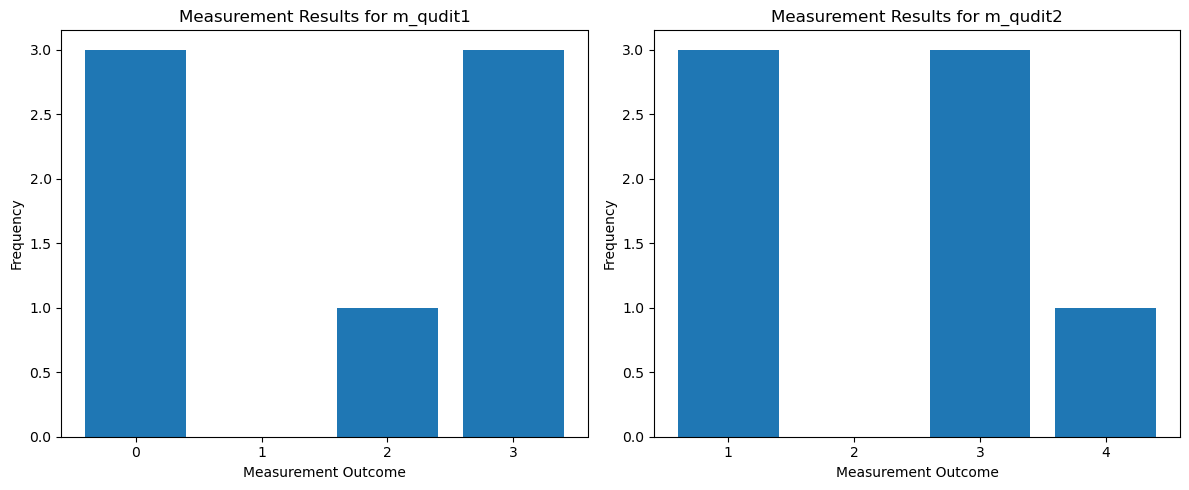

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(m0_results, bins=range(min(m0_results), max(m0_results) + 2), align='left', rwidth=0.8)
axs[0].set_title("Measurement Results for m_qudit1")
axs[0].set_xlabel("Measurement Outcome")
axs[0].set_ylabel("Frequency")
axs[0].set_xticks(range(min(m0_results), max(m0_results) + 1))

axs[1].hist(m1_results, bins=range(min(m1_results), max(m1_results) + 2), align='left', rwidth=0.8)
axs[1].set_title("Measurement Results for m_qudit2")
axs[1].set_xlabel("Measurement Outcome")
axs[1].set_ylabel("Frequency")
axs[1].set_xticks(range(min(m1_results), max(m1_results) + 1))

plt.tight_layout()
plt.show()